<div style="font-size: 20px">This notebook is prepared for the submission of Assignment 2 of "Metaheuristic Optimization" class by Dr. Amir Nakib to Summer 2019 cohort of Data ScienceTech Institute.</div>

- Exercise 1 and 2: this notebook 'DSTI Metaheuristic Assignment2 at 20190610 - Exercise 1&2_ver2.ipynb'
- Exercise 3: Attached 'DSTI Metaheuristic Assignment2 at 20190610 - Exercise 3.nb.html'


From (b), the new prices are given by solving the following equetions:

$\lambda_4 = p_1-100 = p_2 - 150 = p_3 - 300$

$100 exp(- \frac{\lambda_4+100}{100} ) + 150 exp(- \frac{\lambda_4+150}{150} ) + 300 exp(- \frac{\lambda_4+300}{300} ) = 150+3$

<br>

Here, new $\lambda_4 = 52.874$ with decrease by 3.874. 

Therefore, the airline changes the each price with decrease of 3.874.

And new optimized revenue is 43,835.

# Exercise 1

### (a)

Maximize the following objective function $J$ :

$J(p_1, p_2, p_3) = 100 p_1 exp(- \frac{p_1}{100} ) + 150 p_2 exp(- \frac{p_2}{150} ) + 300 p_3 exp(- \frac{p_3}{300} )$

, with the contraints:

$p_1 >= 0, p_2 >= 0, p_3 >= 0,$

$100 exp(- \frac{p_1}{100} ) + 150 exp(- \frac{p_2}{150} ) + 300 exp(- \frac{p_3}{300} ) <= 150$

### (b)

Gradient of objective function $J$ is:

$ \begin{pmatrix}
    (100 - p_1) exp (- \frac{p_1}{100} ) \\
    (150 - p_2) exp (- \frac{p_2}{150} ) \\
    (300 - p_3) exp (- \frac{p_3}{300} ) \\
  \end{pmatrix}$

Hessian matrix of the objective function $J$ is diagonal matrix with following three diagonal elements:

$ (\frac{p_1}{100} - 2) exp (- \frac{p_1}{100} ) $,

$(\frac{p_2}{150} - 2) exp (- \frac{p_2}{150} )$,

$(\frac{p_3}{300} - 2) exp (- \frac{p_3}{300} )$

$ \\ $

Using Lagrangian multiplier $ \lambda_i (i = 1, 2, 3, 4) $, let's put the Lagrangian as follows:

$
L(p_1,p_2,p_3,\lambda_1,\lambda_2,\lambda_3,\lambda_4) = - J + \lambda_1 (-p_1) + \lambda_2 (-p_2) + \lambda_3 (-p_3) + \lambda_4 (100 exp(- \frac{p_1}{100} ) + 150 exp(- \frac{p_2}{150} ) + 300 exp(- \frac{p_3}{300} ) - 150) 
$


From KKT conditions:

$
-(100 - p_1) exp (- \frac{p_1}{100} ) - \lambda_1 - \lambda_4 exp( - \frac{p_1}{100} ) = 0 \\
-(100 - p_2) exp (- \frac{p_2}{150} ) - \lambda_2 - \lambda_4 exp( - \frac{p_2}{150} ) = 0 \\
-(100 - p_3) exp (- \frac{p_3}{300} ) - \lambda_3 - \lambda_4 exp( - \frac{p_3}{300} ) = 0 \\
\lambda_i >=0 \: for \: i=1,2,3,4 \\
\lambda_i p_i = 0 \: for \: i=1,2,3 \\
\lambda_4 (100 exp(- \frac{p_1}{100} ) + 150 exp(- \frac{p_2}{150} ) + 300 exp(- \frac{p_3}{300} ) - 150) = 0
$

$ \\ $

Solving this,

$\lambda_1, \lambda_2, \lambda_3 = 0$

$\lambda_4 = p_1-100 = p_2 - 150 = p_3 - 300$

$100 exp(- \frac{\lambda_4+100}{100} ) + 150 exp(- \frac{\lambda_4+150}{150} ) + 300 exp(- \frac{\lambda_4+300}{300} ) = 150$

A solver (such as Excel Solver) gives us the answer $p^*$ as:

$\lambda_4=56.748, \: p_1^*=156.748, \: p_2^*=206.748, \: p_3^*=356.748$

Here,

$D_1^*=20.857, \: D_2^*=37.800, \: D_3^*=91.343$  
($D_i$ are continuous variable as assumed.)

The total revenue is 43,671.

<br>

Hessian matrix of $-J$ is not positive definite for $\forall p \in R^3$, but is strictly positive definite at the found $D_i^*$ above, therefore it is maximum.

### (b-2) Using scipy.optimize for double check

In [1]:
import numpy as np
from scipy.optimize import minimize

def obj2min(p):
    return -100*p[0]*np.exp(-p[0]/100)-150*p[1]*np.exp(-p[1]/150)-300*p[2]*np.exp(-p[2]/300)

def constraint(p):
    return 150 - 100*np.exp(-p[0]/100)-150*np.exp(-p[1]/150)-300*np.exp(-p[2]/300)

p0 = [10,10,10]
b = (0,np.inf)
bound = (b,b,b)
con = [{'type': 'ineq','fun': constraint}]

# Sequential quadratic programming (SQP) as recommended by Lecture 12 slide.
sol = minimize(obj2min, p0, method='SLSQP', bounds=bound, constraints=con) 
sol.x

array([156.74910271, 206.74792248, 356.74836292])

### (c-a.)

We can say $\lambda_1, \lambda_2, \lambda_3 = 0$ around the solutions $p_i^*$. Therefore, we simplify Lagurangian as follows:


$L(p_1,p_2,p_3,\lambda_4) = - J(p_1,p_2,p_3) + \lambda_4 (100 exp(- \frac{p_1}{100} ) + 150 exp(- \frac{p_2}{150} ) + 300 exp(- \frac{p_3}{300} ) - 150)$

with non-zero $\lambda_4$ .

Here, we put a column vector by optimal prices $p_1, p_2, p_3$ as $p^*$, and the constraint $100 exp(- \frac{p_1}{100} ) + 150 exp(- \frac{p_2}{150} ) + 300 exp(- \frac{p_3}{300} ) - 150$ as $g(p)$ .

Now, constraint $g(p)$ is active. Therefore, $g(p^*)=0$.

When the constraint term decreases by $\epsilon$ (such as increasing seats from 150 to 153), $g(p^*) = -\epsilon$. When assuming with the change of constraint, the KKT is still satisfied, $\frac{dL}{d \epsilon}=0$ (but the change in constraint not large enough to change the $\lambda_4$), therefore:

$0 = -\frac {dJ(p^*)}{d \epsilon} + \lambda_4 \frac {g(p^*)}{d \epsilon} = -\frac {dJ(p^*)}{d \epsilon} + \lambda_4 $

This means the lagrangian multiplier to the active constraint represents the $p^*$-neighborhood sensitivity of its constraint to objective function. 

<br><br>

As a conclusion,

The increased revenue by additional three seats is $\Delta J= \lambda_4 * 3 = 56.748 * 3 = 170.244$

### (c-b.)

Taking the derivative by $\epsilon$ of $g(p^*) = -\epsilon$, the chain rule leads to:

$\nabla g(p^*)^T \frac{dp^*}{d\epsilon} = -1$

Here,

$\nabla g(p^*) =  \begin{pmatrix}
    - exp (- \frac{p^*_1}{100} ) \\
    - exp (- \frac{p^*_2}{150} ) \\
    - exp (- \frac{p^*_3}{300} ) \\
  \end{pmatrix}$, with  $p_1^*=156.748, \: p_2^*=206.748, \: p_3^*=356.748$

Also from KKT, $p_1-100 = p_2 - 150 = p_3 - 300$ still saffices.

<br><br>

From all above, $\Delta p^*$ by change of $\epsilon=1$ is the same for all three price element and it is $- \frac{1}{exp(\frac{-156.748}{100})+exp(\frac{-200.748}{150})+exp(\frac{-356.748}{300}) } = - 1.290$

With the increase of 3 plane seats, the price decrease is 3.869 for all three seat classes, which are:

$p_1=152.879, \: p_2=202.879, \: p_3=352.879$

And new optimized revenue is 43,835.

### (c-2) Double check by solving the optimization on Scipy with additional two seats.

In [2]:
def obj2min(p):
    return -100*p[0]*np.exp(-p[0]/100)-150*p[1]*np.exp(-p[1]/150)-300*p[2]*np.exp(-p[2]/300)

def constraint(p):
    return 150 + 3 - 100*np.exp(-p[0]/100)-150*np.exp(-p[1]/150)-300*np.exp(-p[2]/300)

p0 = [10,10,10]
b = (0,np.inf)
bound = (b,b,b)
con = [{'type': 'ineq','fun': constraint}]

sol = minimize(obj2min, p0, method='SLSQP', bounds=bound, constraints=con)
sol.x

array([152.87520895, 202.87435581, 352.87395097])

<hr style="border-width: thick">


# Exercise 2

In [3]:
import math
import numpy as np
import pandas as pd

from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib inline

## Ex2-0. Defining function and gradients

##### Banana Function:

$ f(x) = 100 ( x_2 - x_1^2)^2 + (1-x_1)^2 $

$ \nabla{f} = \begin{pmatrix} -400x_1(x_2-x_1^2) - 2 (1-x_1) \\ 200(x_2-x_1^2) \end{pmatrix}$

with:

$ x_1, x_2 \in [-5,5] $

##### Eggcrate Function:

$ f(x) = x_1^2 + x_2^2 + 25(\sin ^2 x_1 + \sin ^2 x_2) $

$ \nabla{f} = \begin{pmatrix} 2x_1 + 50 \sin x_1 \cos x_1 \\ 2x_2 + 50 \sin x_2 \cos x_2 \end{pmatrix}$

with:

$ x_1, x_2 \in [-2 \pi, 2 \pi ] $

##### Golinski's Speed Reducer:

$ f(x) = 0.7854 x_1 x_2^2 ( 3.333 x_3 ^2 + 14.9334 x_3 - 43.0934) - 1.5079 x_1 (x_6^2 + x_7^2) + 7.4777 (x_6^3 + x_7^3) + 0.7854(x_4 x_6^2+x_5 x_7^2) $

$ \nabla{f} = \begin{pmatrix}  
    0.7854 x_2^2 ( 3.333 x_3 ^2 + 14.9334 x_3 - 43.0934) - 1.5079 (x_6^2 + x_7^2) \\ 
    2 * 0.7854 x_1 x_2 ( 3.333 x_3 ^2 + 14.9334 x_3 - 43.0934) \\
    0.7854 x_1 x_2^2 ( 2 * 3.333 x_3 + 14.9334) \\
    0.7854 x_6^2 \\
    0.7854 x_7^2 \\
    - 2 * 1.5079 x_1 x_6 + 3 * 7.4777 x_6^2 + 2 * 0.7854 x_4 x_6 \\
    - 2 * 1.5079 x_1 x_7 + 3 * 7.4777 x_7^2 + 2 * 0.7854 x_5 x_7
\end{pmatrix} $

Skipping constrains because there are 25 constraints and they are too much to copy here.
<br><br>

In [4]:
#Objective functions
def bananaFunc(x):
    res = 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    return res

def eggcrateFunc(x):
    res = x[0]**2+x[1]**2+25*(math.sin(x[0])**2 + math.sin(x[1])**2)
    return res

def golSRFunc(x):
    x_1, x_2, x_3, x_4, x_5, x_6, x_7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    res = 0.7854*x_1*x_2**2*(3.333*x_3**2 + 14.9334*x_3 - 43.0934) - 1.5079*x_1*(x_6**2 + x_7**2) \
           + 7.4777*(x_6**3 + x_7**3) + 0.7854*(x_4*x_6**2+x_5*x_7**2)
    return res

In [5]:
def visGraph(func, bn, tit):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = bn * np.outer(np.cos(u), np.sin(v))
    y = bn * np.outer(np.sin(u), np.sin(v))
    z = []

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    z = np.array( [[func([x[i][j],y[i][j]]) for j in range(100)] for i in range(100)] )

    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(tit)
    plt.show()

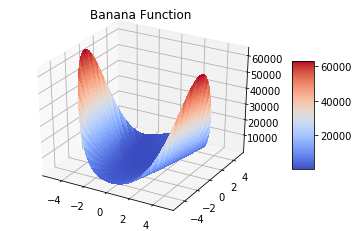

In [6]:
visGraph(bananaFunc, 5, 'Banana Function')

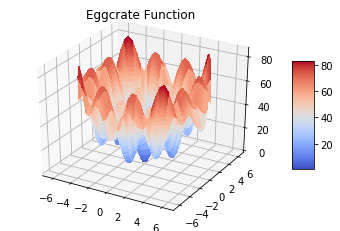

In [7]:
visGraph(eggcrateFunc, 2*np.pi, 'Eggcrate Function')

In [8]:
# callback function to display the iteration progress
def bananaCallbackFunc(x):
    global Nfeval
    global xlog
    global reslog
    xlog.append([x[0],x[1]])
    reslog.append(bananaFunc(x))
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, x[0], x[1], bananaFunc(x)))
    Nfeval += 1

def eggcrateCallbackFunc(x):
    global Nfeval
    global xlog
    global reslog
    xlog.append([x[0],x[1]])
    reslog.append(eggcrateFunc(x))
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, x[0], x[1], eggcrateFunc(x)))
    Nfeval += 1
    
def golSRCallbackFunc(x):
    global Nfeval
    global xlog
    global reslog
    xlog.append([x[0], x[1], x[2], x[3], x[4], x[5], x[6]])
    reslog.append(golSRFunc(x))
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}  {4: 3.6f}   {5: 3.6f}   {6: 3.6f}  {7: 3.6f}   {8: 3.6f}'\
          .format(Nfeval, x[0], x[1], x[2], x[3], x[4], x[5], x[6], golSRFunc(x)))
    print(constGSR(x,showcount=True),'out of 11 non-bound constraints satisfied.\n\n')
    Nfeval += 1
    
#Callbacks without print   
def bananaCallbackFunc2(x):
    global xlog
    global reslog
    xlog.append([x[0],x[1]])
    reslog.append(bananaFunc(x))

def eggcrateCallbackFunc2(x):
    global xlog
    global reslog
    xlog.append([x[0],x[1]])
    reslog.append(eggcrateFunc(x))
    
def golSRCallbackFunc2(x):
    global xlog
    global reslog
    xlog.append([x[0], x[1], x[2], x[3], x[4], x[5], x[6]])
    reslog.append(golSRFunc(x))

In [9]:
#Gradient functions
def gradBananaFunc(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]), 200*(x[1]-x[0]**2)])

def gradEggcrateFunc(x):
    return np.array([2*x[0]+50*math.sin(x[0])*math.cos(x[0]), 2*x[1]+50*math.sin(x[1])*math.cos(x[1])])

def gradGolSRFunc(x):
    x_1, x_2, x_3, x_4, x_5, x_6, x_7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return np.array([
        0.7854 * x_2**2 * ( 3.333 * x_3**2 + 14.9334 * x_3 - 43.0934) - 1.5079 * (x_6**2 + x_7**2),
        2 * 0.7854 * x_1 * x_2 * ( 3.333 * x_3**2 + 14.9334 * x_3 - 43.0934),
        0.7854 * x_1 *x_2**2*( 2 * 3.333*x_3 + 14.9334),
        0.7854 * x_6**2,
        0.7854 * x_7**2,
        - 2 * 1.5079 * x_1 * x_6 + 3 * 7.4777 * x_6**2 + 2 * 0.7854 * x_4 * x_6,
        - 2 * 1.5079 * x_1 * x_7 + 3 * 7.4777 * x_7**2 + 2 * 0.7854 * x_5 * x_7
    ])

In [10]:
# Constrains of Golinski's Speed Reducer
# Ref: https://arc.aiaa.org/doi/abs/10.2514/2.1984

def constGSR1(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - 27/x1/x2**2/x3

def constGSR2(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - 397.5/x1/x2**2/x3**2

def constGSR3(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - 1.93/x2/x3*x4**3/x6**4

def constGSR4(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - 1.93/x2/x3*x5**3/x7**4

def constGSR5(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - ( ( (745*x4/x2/x3)**2 + 16.9*10**6 )**0.5 / (110*x6**3))

def constGSR6(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - ( ( (745*x5/x2/x3)**2 + 157.5*10**6 )**0.5 / (85*x7**3)) 

def constGSR7(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - x2*x3 / 40

def constGSR8(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - 5*x2/x1

def constGSR9(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - x1/12*x2 ##<--------------- x1/12*x2 ???

def constGSR24(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - (1.5*x6 + 1.9)/x4

def constGSR25(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 1.0 - (1.1*np.float(x7) + 1.9)/x5

def constGSR10(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x1 - 2.6

def constGSR11(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 3.6 - x1

def constGSR12(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x2 - 0.7

def constGSR13(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 0.8 - x2

def constGSR14(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x3 - 17 ##<--------------- Integer -> Smear at last step?

def constGSR15(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 28 - x3 ##<--------------- Integer -> Smear at last step?

def constGSR16(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x4 - 7.3

def constGSR17(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 8.3 - x4

def constGSR18(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x5 - 7.3

def constGSR19(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 8.3 - x5

def constGSR20(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x6 - 2.9

def constGSR21(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 3.9 - x6

def constGSR22(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return x7 - 5.0

def constGSR23(x):
    x1, x2, x3, x4, x5, x6, x7 = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    return 5.9 - x7

#####################

def constGSR(x,showcount=False): # Satisfying all the constraints
    if not showcount:
        if (
            constGSR1(x) >= 0
            and
            constGSR2(x) >= 0
            and
            constGSR3(x) >= 0
            and
            constGSR4(x) >= 0
            and
            constGSR5(x) >= 0
            and
            constGSR6(x) >= 0
            and
            constGSR7(x) >= 0
            and
            constGSR8(x) >= 0
            and
            constGSR9(x) >= 0
            and
            constGSR10(x) >= 0
            and
            constGSR11(x) >= 0
            and
            constGSR12(x) >= 0
            and
            constGSR13(x) >= 0
            and
            constGSR14(x) >= 0
            and
            constGSR15(x) >= 0
            and
            constGSR16(x) >= 0
            and
            constGSR17(x) >= 0
            and
            constGSR18(x) >= 0
            and
            constGSR19(x) >= 0
            and
            constGSR20(x) >= 0
            and
            constGSR21(x) >= 0
            and
            constGSR22(x) >= 0
            and
            constGSR23(x) >= 0
            and
            constGSR24(x) >= 0
            and
            constGSR25(x) >= 0
        ) :
            return True
        return False
    else:
        return sum(map(lambda k: k>=0, [constGSR1(x),constGSR2(x),constGSR3(x),constGSR4(x),constGSR5(x),
                                        constGSR6(x),constGSR7(x),constGSR8(x),constGSR9(x),constGSR24(x),constGSR25(x),]))

## Ex2-1. Gradient-based Optimization Using Scipy.minimize

### Ex2-1.1. Banana Function

- I will use Quasi-Newton (BFGS: Broydon-Fletcher-Goldfarb-Shanno) as recommended by Lecture 12 slide.

- Maximum number of iterations to be 100.

#### Ex2-1.1.1. One Initial Point

In [11]:
np.random.seed(2)
x00_banana = np.random.rand(10,2)*10 - 5

In [12]:
x0 = x00_banana[0]
b = (-5,5)
bound = (b,b)
Nfeval = 1
xlog = []
reslog = []

# Quasi-Newton (BFGS: Broydon-Fletcher-Goldfarb-Shanno) as recommended by Lecture 12 slide.
print('{0:4s}   {1:9s}   {2:9s}   {3:9s}'.format('Iter', ' X1', ' X2',  'f(X)')  )
sol = minimize(bananaFunc, x0, callback=bananaCallbackFunc, method='BFGS', bounds=bound, options={'maxiter':100}) 

Iter    X1          X2         f(X)     
   1    0.156626   -4.119927    1718.365513
   2   -0.122715   -1.923431    377.034827
   3   -0.151447   -0.078076    2.346175
   4   -0.151159    0.022641    1.325172
   5    0.094628   -0.003248    0.834587
   6    0.139871   -0.004091    0.795777
   7    0.179365    0.009167    0.726363
   8    0.237420    0.039760    0.609113
   9    0.369850    0.112392    0.456610
  10    0.459553    0.216849    0.295286
  11    0.527876    0.270493    0.229560
  12    0.581518    0.321224    0.203822
  13    0.621079    0.370518    0.166747
  14    0.670980    0.444682    0.111314
  15    0.719114    0.507603    0.087963
  16    0.789305    0.612619    0.055175
  17    0.837434    0.700585    0.026478
  18    0.880815    0.770158    0.017427
  19    0.921498    0.843302    0.009593
  20    0.947314    0.897754    0.002788
  21    0.987582    0.972288    0.001072
  22    0.983482    0.966741    0.000298
  23    0.993004    0.985944    0.000050
  24    0.9

C:\Users\daydr\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


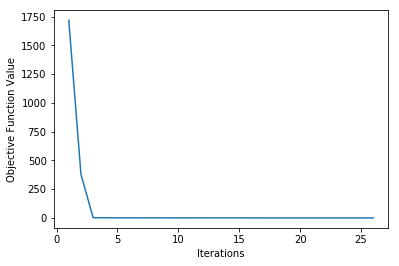

In [13]:
plt.figure()
plt.plot(range(1,len(reslog)+1),reslog)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()

In [14]:
rmin = np.min(reslog)
xmin = xlog[reslog.index(rmin)]
print('Iteration minimum is',rmin,'at',xmin)

Iteration minimum is 9.280255632630889e-12 at [0.9999974261832995, 0.9999946894093248]


#### Ex2-1.1.2. Ten Initial Points

In [15]:
b = (-5,5)
bound = (b,b)
xlogAll=[]
reslogAll=[]

for i in range(10):
    x0 = x00_banana[i]

    xlog=[]
    reslog=[]
    sol = minimize(bananaFunc, x0, callback=bananaCallbackFunc2, method='BFGS', bounds=bound, options={'maxiter':100}) 
    xlogAll += [xlog]
    reslogAll += [reslog]

C:\Users\daydr\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\daydr\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


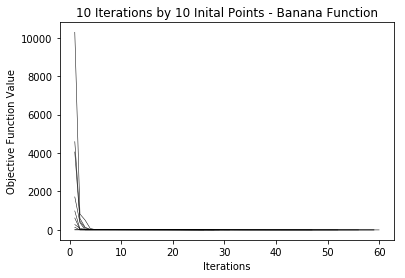

Wall time: 217 ms


In [16]:
%%time
df = pd.DataFrame(reslogAll).transpose()
x = range(1,len(df)+1)
plt.figure()
plt.title('10 Iterations by 10 Inital Points - Banana Function')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
for i in range(10):
    plt.plot(x,df[i],color='black',linewidth=.5)
plt.show()

In [17]:
def findMinXandRes(reslogAll):
    im,jm=0,0
    rmin = np.inf
    for i in range(len(reslogAll)):
        for j in range(len(reslogAll[i])):
            if rmin > reslogAll[i][j]:
                rmin = reslogAll[i][j]
                im = i
                jm = j

    return im,jm,rmin

In [18]:
im,jm,rmin = findMinXandRes(reslogAll)
print('Miminum in all iterations is',rmin,'at',xlogAll[im][jm])

Miminum in all iterations is 6.2964742729340685e-12 at [0.9999975894561844, 0.9999952486141469]


#### Ex2-1.1.3. Observations

- Global minimum was easily found by any inital points within 5 iterations.

<br>

### Ex2-1.2. Eggcrate Function

- I will use Quasi-Newton (BFGS: Broydon-Fletcher-Goldfarb-Shanno) as recommended by Lecture 12 slide.

- Maximum number of iterations to be 100.

#### Ex2-1.2.1. One Initial Point

In [19]:
np.random.seed(1)
x00_egg = np.random.rand(10,2)*4*math.pi - 2*math.pi

In [20]:
x0 = x00_egg[0]
b = (-2*math.pi,2*math.pi)
bound = (b,b)
Nfeval = 1
xlog = []
reslog = []

# Quasi-Newton (BFGS: Broydon-Fletcher-Goldfarb-Shanno) as recommended by Lecture 12 slide.
print('{0:4s}   {1:9s}   {2:9s}   {3:9s}'.format('Iter', ' X1', ' X2',  'f(X)')  )
sol = minimize(eggcrateFunc, x0, callback=eggcrateCallbackFunc, method='BFGS', bounds=bound, options={'maxiter':100}) 

Iter    X1          X2         f(X)     
   1   -0.131906    3.205136    10.823566
   2    0.128119    2.996195    9.926522
   3   -0.028583    2.983535    9.542089
   4   -0.000654    3.031244    9.491638
   5    0.000682    3.019081    9.488216
   6   -0.000048    3.019595    9.488197
   7    0.000001    3.019603    9.488197
   8   -0.000000    3.019602    9.488197


C:\Users\daydr\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


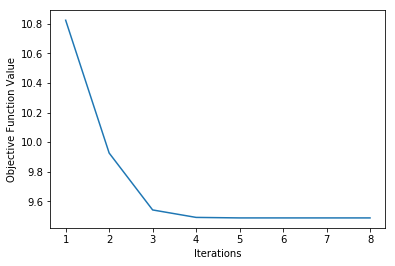

In [21]:
plt.figure()
plt.plot(range(1,len(reslog)+1),reslog)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()

In [22]:
rmin = np.min(reslog)
xmin = xlog[reslog.index(rmin)]
print('Iteration minimum is',rmin,'at',xmin)

Iteration minimum is 9.48819733910627 at [-4.335399755441035e-09, 3.019601863708153]


- Failed to find global minimum.

#### Ex2-1.2.2. Ten Initial Points

In [23]:
b = (-2*math.pi,2*math.pi)
bound = (b,b)
xlogAll = []
reslogAll=[]

for i in range(10):
    x0 = x00_egg[i]
 
    xlog = []
    reslog=[]
    sol = minimize(eggcrateFunc, x0, callback=eggcrateCallbackFunc2, method='BFGS', bounds=bound, options={'maxiter':100}) 
    xlogAll += [xlog]
    reslogAll += [reslog]

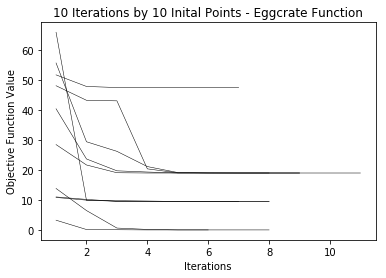

Wall time: 194 ms


In [24]:
%%time
df = pd.DataFrame(reslogAll).transpose()
x = range(1,len(df)+1)
plt.figure()
plt.title('10 Iterations by 10 Inital Points - Eggcrate Function')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
for i in range(10):
    plt.plot(x,df[i],color='black',linewidth=.5)
plt.show()

In [25]:
im,jm,rmin = findMinXandRes(reslogAll)
print('Miminum in all iterations is',rmin,'at',xlogAll[im][jm])

Miminum in all iterations is 7.08902739354229e-14 at [1.8300232877087893e-08, -4.890450361838487e-08]


#### Ex2-1.2.3. Observations

- Out of 10 inital points, only 2 found the global miminim and others were trapped by local minimum.

<br>

### Ex2-1.3. Golinski's Speed Function

- I will use SQP (SLSQP: Sequential Least SQuares Programming) as recommended by Lecture 12 slide.
- Maximum number of iterations to be 100.
- Objective function has penalty +10^5*delta if they has off-constrain solution, where delta represents sum of absolute distances from constraint boundaries.
    - I tried the contant penalty to off-constrain solutions but the optimization did not converge well. I presume this is because the constant penalty term does not have gradient and inefficient in minimizing.

In [26]:
# Constant penalty of 10000 at off-constrain solution
# def golSRFunc1(x):
#     if not constGSR(x):
#         return golSRFunc(x) + 10000.0 #Penalty term when not meeting the constrains.
#     return golSRFunc(x)

# Penalty of 10^5*delta at off-constrain solution
def golSRFunc2(x):
    return golSRFunc(x) + (0.0
        - np.minimum(0.0,constGSR1(x))
        - np.minimum(0.0,constGSR2(x))
        - np.minimum(0.0,constGSR3(x))
        - np.minimum(0.0,constGSR4(x))
        - np.minimum(0.0,constGSR5(x))
        - np.minimum(0.0,constGSR6(x))
        - np.minimum(0.0,constGSR7(x))
        - np.minimum(0.0,constGSR8(x))
        - np.minimum(0.0,constGSR9(x))
        - np.minimum(0.0,constGSR10(x))
        - np.minimum(0.0,constGSR11(x))
        - np.minimum(0.0,constGSR12(x))
        - np.minimum(0.0,constGSR13(x))
        - np.minimum(0.0,constGSR14(x))
        - np.minimum(0.0,constGSR15(x))
        - np.minimum(0.0,constGSR16(x))
        - np.minimum(0.0,constGSR17(x))
        - np.minimum(0.0,constGSR18(x))
        - np.minimum(0.0,constGSR19(x))
        - np.minimum(0.0,constGSR20(x))
        - np.minimum(0.0,constGSR21(x))
        - np.minimum(0.0,constGSR22(x))
        - np.minimum(0.0,constGSR23(x))
        - np.minimum(0.0,constGSR24(x))
        - np.minimum(0.0,constGSR25(x))
    ) *10**5

In [46]:
def golSRCallbackFunc2_1(x):
    global Nfeval
    global xlog
    global reslog
    xlog.append([x[0], x[1], x[2], x[3], x[4], x[5], x[6]])
    reslog.append(golSRFunc2(x))
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}  {4: 3.6f}   {5: 3.6f}   {6: 3.6f}  {7: 3.6f}   {8: 3.6f}'\
          .format(Nfeval, x[0], x[1], x[2], x[3], x[4], x[5], x[6], golSRFunc2(x)))
    print(constGSR(x,showcount=True),'out of 11 non-bound constrains satisfied.\n\n')
    Nfeval += 1
    
def golSRCallbackFunc2_2(x):
    global xlog
    global reslog
    global constlog
    xlog.append([x[0], x[1], x[2], x[3], x[4], x[5], x[6]])
    reslog.append(golSRFunc2(x))
    constlog.append(constGSR(x,showcount=True))

#### Ex2-1.3.1. One Initial Point

In [28]:
np.random.seed(2)
x00_golSR = np.random.rand(100,7)
for i in range(100):
    x00_golSR[i][0] += 2.6
    x00_golSR[i][1] /= 10.0
    x00_golSR[i][1] += 0.7
    x00_golSR[i][1] /= 10.0
    x00_golSR[i][2] *= 11.0
    x00_golSR[i][2] += 17.0
    x00_golSR[i][2] = round(x00_golSR[i][2])
    x00_golSR[i][3] += 7.3
    x00_golSR[i][4] += 7.3
    x00_golSR[i][5] += 2.9
    x00_golSR[i][6] /= 2.0
    x00_golSR[i][6] += 5.0

In [29]:
x0 = x00_golSR[0]

bound = ( 
    (2.6,3.6),
    (0.7,0.8),
    (17.0,28.0),
    (7.3,8.3),
    (7.3,8.3),
    (2.9,3.9),
    (5.0,5.5)
)
con = [
    {'type': 'ineq','fun': constGSR1},
    {'type': 'ineq','fun': constGSR2},
    {'type': 'ineq','fun': constGSR3},
    {'type': 'ineq','fun': constGSR4},
    {'type': 'ineq','fun': constGSR5},
    {'type': 'ineq','fun': constGSR6},
    {'type': 'ineq','fun': constGSR7},
    {'type': 'ineq','fun': constGSR8},
    {'type': 'ineq','fun': constGSR9},
    {'type': 'ineq','fun': constGSR24},
    {'type': 'ineq','fun': constGSR25},
]
Nfeval = 1
xlog = []
reslog = []

# SLSQP: Sequential Least SQuares Programming as recommended by Lecture 12 slide.
print('{0:4s}   {1:9s}   {2:9s}   {3:9s}  {4:9s}   {5:9s}   {6:9s}  {7:9s}  {8:9s}'\
      .format('Iter', ' X1', ' X2', 'X3',' X4', ' X5',' X6', ' X7', 'f(X)')  )
sol = minimize(golSRFunc2, x0, callback=golSRCallbackFunc2_1, method='SLSQP', bounds=bound, 
               constraints=con, options={'maxiter':100}) 

Iter    X1          X2         X3          X4          X5          X6         X7        f(X)     
   1    3.569472    0.800000    17.000123   7.752250    7.956379    3.815455   5.446882    15827.580083
10 out of 11 non-bound constrains satisfied.


   2    3.600000    0.700000    17.000000   7.300000    7.702229    3.207322   5.275399    17611.758124
8 out of 11 non-bound constrains satisfied.


   3    3.600000    0.700196    17.000000   7.300000    7.705657    3.314354   5.279703    6723.249155
8 out of 11 non-bound constrains satisfied.


   4    3.600000    0.713151    17.000473   7.778962    8.235480    3.435085   5.289879    3135.426133
11 out of 11 non-bound constrains satisfied.


   5    3.448822    0.700000    17.000000   7.300000    8.297319    3.424008   5.286616    4503.952623
9 out of 11 non-bound constrains satisfied.


   6    3.599887    0.700019    17.000001   7.300006    8.299999    3.425592   5.286855    3066.464404
10 out of 11 non-bound constrains satisfied.


   

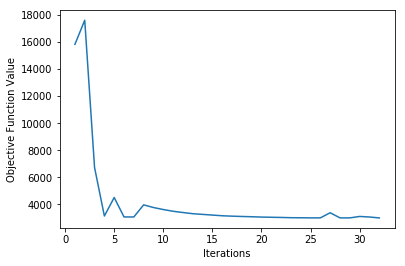

In [30]:
plt.figure()
plt.plot(range(1,len(reslog)+1),reslog)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()

In [31]:
rmin = np.min(reslog)
xmin = xlog[reslog.index(rmin)]
print('Iteration minimum is',rmin,'at',xmin)
print(constGSR(xmin,showcount=True),'out of 11 non-bound constrains satisfied.')

Iteration minimum is 2994.6069121489227 at [3.4999986064552866, 0.7, 17.0, 7.3, 7.716013249516835, 3.3508604067994905, 5.2866543483627195]
9 out of 11 non-bound constrains satisfied.


- This solution with minimum objective function did not meet all the contrains but there's another which met all the contrarins.

In [32]:
#Or there's a better solution which meets the all the constraints
rmin = reslog[31]
xmin = xlog[reslog.index(rmin)]
print('Iteration minimum is',rmin,'at',xmin)
print(constGSR(xmin,showcount=True),'out of 11 non-bound constrains satisfied.')

Iteration minimum is 2994.622834614314 at [3.5001323406756732, 0.7000014004802986, 17.0000000276457, 7.30000000148385, 7.716051602317934, 3.3508555838786664, 5.286681394173037]
11 out of 11 non-bound constrains satisfied.


#### Ex2-1.3.2. Hundred Initial Points

- Since this function have very limited solution space, I increased the number of random initial points to 100.

In [48]:
bound = ( 
    (2.6,3.6),
    (0.7,0.8),
    (17,28),
    (7.3,8.3),
    (7.3,8.3),
    (2.9,3.9),
    (5.0,5.5)
)
con = [
    {'type': 'ineq','fun': constGSR1},
    {'type': 'ineq','fun': constGSR2},
    {'type': 'ineq','fun': constGSR3},
    {'type': 'ineq','fun': constGSR4},
    {'type': 'ineq','fun': constGSR5},
    {'type': 'ineq','fun': constGSR6},
    {'type': 'ineq','fun': constGSR7},
    {'type': 'ineq','fun': constGSR8},
    {'type': 'ineq','fun': constGSR9},
    {'type': 'ineq','fun': constGSR24},
    {'type': 'ineq','fun': constGSR25},
]
xlogAll = []
reslogAll=[]
constlogAll=[]

for i in range(100):
    x0 = x00_golSR[i]
    
    xlog = []
    reslog=[]
    constlog=[]
    sol = minimize(golSRFunc2, x0, callback=golSRCallbackFunc2_2, method='SLSQP', bounds=bound, 
                   constraints=con, 
                   options={'maxiter':100}) 
    xlogAll += [xlog]
    reslogAll += [reslog]
    constlogAll += [constlog]

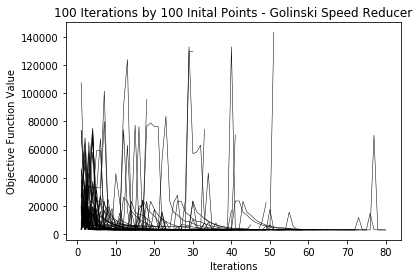

Wall time: 778 ms


In [49]:
%%time
df = pd.DataFrame(reslogAll).transpose()
x = range(1,len(df)+1)
plt.figure()
plt.title('100 Iterations by 100 Inital Points - Golinski Speed Reducer')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
for i in range(100):
    plt.plot(x,df[i],color='black',linewidth=.5)
plt.show()

In [50]:
im,jm,rmin = findMinXandRes(reslogAll)
print('Miminum in all iterations is',rmin,'at',xlogAll[im][jm])
print(constGSR(xlogAll[im][jm],showcount=True),'out of 11 non-bound constraints satisfied.')

Miminum in all iterations is 2994.3704055101575 at [3.500000421323182, 0.7, 17.000000526025737, 7.300003761942482, 7.715321994999511, 3.3502195690271828, 5.2866557648525845]
11 out of 11 non-bound constraints satisfied.


- Check if it still works when variable x3 is forced to be integer.

In [51]:
x_final = [3.500000421323182, 0.7, 17.000000526025737, 7.300003761942482, 7.715321994999511, 3.3502195690271828, 5.2866557648525845]
x_final[2] = np.int(x_final[2])
print('Miminum in all iterations is', golSRFunc(x_final) ,'at',x_final)
print(constGSR(x_final,showcount=True),'out of 11 non-bound constraints satisfied.')

Miminum in all iterations is 2994.370314636558 at [3.500000421323182, 0.7, 17, 7.300003761942482, 7.715321994999511, 3.3502195690271828, 5.2866557648525845]
11 out of 11 non-bound constraints satisfied.


-> Results even better!

In [52]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

- Value of objective functions to all simulations and iterations

In [53]:
#Value of objective functions to all simulations and iterations
pd.DataFrame(reslogAll).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,15827.580083,48166.256082,3631.364291,18241.198214,15659.261220,29088.201980,5613.516376,3607.636805,21838.623358,46261.228232,8380.827901,14144.242674,61414.808411,17770.796562,9826.581942,8303.444038,48704.913295,17923.743642,18249.334156,81514.568712,12963.493608,19816.611097,19210.964595,29864.097876,3576.265263,24151.686992,7365.721993,18847.570853,3510.822936,14223.654079,14064.887285,25950.765048,26721.082681,8019.742404,15884.414588,5325.053226,3357.534474,8706.945688,3978.417297,30761.872309,18926.200135,14978.826547,15908.926321,20279.144084,6493.172817,78748.641882,6047.695626,73436.762432,38919.252267,35801.673600,20722.915660,6151.101643,13796.945970,3357.360300,45353.320619,13077.491937,3629.763902,38885.860022,23487.180655,3951.926885,16607.795433,73685.551593,3691.833956,19626.770387,41369.762711,12395.431771,107559.920344,20957.615218,10114.050875,4434.930112,3398.613382,30967.122905,8595.731672,3569.875062,16242.770865,5994.018549,7763.812432,11289.830392,17104.668098,26460.207353,3357.385915,16591.349644,26759.148507,8249.249741,37908.124253,3663.486789,19419.597296,75043.708895,24164.108895,20243.352835,20559.991525,28241.034078,18658.998182,17337.647949,4928.178139,16631.333645,9720.837276,22476.852409,12287.979947,81344.611501
1,17611.758124,NaN,24842.228224,3340.940693,10248.146798,9824.468763,NaN,8530.090985,25005.550485,13028.367039,13665.752507,33876.717966,NaN,12973.278474,14867.961373,22346.153301,NaN,5853.766216,3698.837502,NaN,NaN,3179.113517,14957.526463,NaN,35058.879787,NaN,14882.759414,7082.592748,6425.165723,6033.907936,6410.932871,68437.477576,58205.806969,NaN,3959.441527,11268.702343,17118.899171,8706.945688,17632.580774,17984.278135,52602.929843,NaN,14760.619464,3241.019882,7156.775043,NaN,15473.303562,23716.020569,3363.769627,48517.212470,14852.276424,4892.555677,17622.247075,19731.021218,3213.632148,3423.513626,14816.752340,NaN,23487.180655,38218.575122,8171.564621,21722.312281,5862.928494,3907.776686,64456.832908,NaN,6608.588790,59557.126337,11603.872689,14888.169398,9388.683932,NaN,3753.474039,15409.426089,18700.279587,6290.008026,9516.207255,9251.434307,19754.559845,31812.258810,23754.728573,16591.349644,34395.183693,NaN,3436.526032,14817.599451,5059.648787,NaN,NaN,6372.991647,14699.416768,4883.936670,3436.866941,11090.086594,13672.559036,15326.211086,NaN,3515.524959,8523.211257,NaN
2,6723.249155,NaN,4106.929493,7058.531268,36548.608992,4837.777610,NaN,4096.096768,43569.848020,3789.386151,3940.434772,4270.713545,NaN,6219.313165,3523.315773,3446.416921,NaN,14908.277065,59080.997003,NaN,NaN,6694.003308,34632.209273,NaN,4217.959489,NaN,32863.959418,33053.062137,4203.236537,3250.379733,4105.172726,23987.640784,25060.391188,NaN,5717.222201,3193.960640,4212.348172,NaN,4046.568028,NaN,3525.852823,NaN,4230.517086,18992.016786,4459.347676,NaN,6014.861730,34184.568562,47575.323762,4387.107718,57242.074200,4030.693521,12085.086307,24536.710498,8912.978017,5794.484430,9941.250399,NaN,NaN,3194.686881,14827.893853,10052.415656,16236.954472,9396.989504,5666.418968,NaN,6912.858694,3154.006136,20264.349205,3388.562141,4263.360740,NaN,3341.775641,4337.824881,11955.600008,3644.636035,8880.520486,7764.410219,40552.784892,5674.263933,4211.206683,NaN,13369.790537,NaN,17206.737249,23115.711958,16048.790386,NaN,NaN,6503.294539,11883.900827,10006.120250,8528.332120,65416.584576,4040.225134,17436.905723,NaN,7823.490455,6966.151265,NaN
3,3135.426133,NaN,3941.299485,5923.760257,72549.823705,3653.863430,NaN,3703.235573,24406.419505,3447.396882,3700.337957,19720.827126,NaN,14885.329058,3089.120787,12908.583097,NaN,3378.534250,25202.443722,NaN,NaN,25149.128536,28378.261982,NaN,3755.370033,NaN,3338.010145,66621.158253,3998.672217

- Number of satisfied constrains to all simulations and iterations

In [54]:
#Number of satisfied constrains to all simulations and iterations
pd.DataFrame(constlogAll).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,10.0,8.0,9.0,10.0,10.0,9.0,9.0,9.0,7.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,10.0,10.0,8.0,10.0,10.0,9.0,8.0,10.0,8.0,10.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,10.0,9.0,11.0,10.0,10.0,7.0,9.0,9.0,10.0,9.0,9.0,8.0,9.0,9.0,8.0,8.0,9.0,10.0,9.0,11.0,9.0,8.0,10.0,8.0,9.0,9.0,8.0,7.0,10.0,9.0,8.0,10.0,8.0,7.0,9.0,8.0,9.0,8.0,9.0,10.0,9.0,10.0,9.0,7.0,10.0,9.0,11.0,10.0,8.0,10.0,9.0,10.0,9.0,8.0,9.0,9.0,9.0,9.0,8.0,10.0,10.0,10.0,10.0,9.0,9.0,8.0
1,8.0,NaN,9.0,11.0,10.0,10.0,NaN,10.0,7.0,9.0,10.0,9.0,NaN,9.0,10.0,9.0,NaN,8.0,9.0,NaN,NaN,10.0,9.0,NaN,9.0,NaN,10.0,9.0,10.0,10.0,8.0,9.0,10.0,NaN,9.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,9.0,11.0,10.0,NaN,9.0,10.0,11.0,9.0,10.0,9.0,10.0,9.0,11.0,11.0,10.0,NaN,9.0,9.0,10.0,8.0,9.0,10.0,9.0,NaN,10.0,10.0,10.0,10.0,10.0,NaN,8.0,10.0,9.0,10.0,10.0,7.0,9.0,10.0,9.0,10.0,8.0,NaN,11.0,10.0,9.0,NaN,NaN,10.0,10.0,10.0,11.0,10.0,9.0,10.0,NaN,11.0,10.0,NaN
2,8.0,NaN,9.0,10.0,8.0,10.0,NaN,9.0,10.0,9.0,9.0,8.0,NaN,9.0,9.0,10.0,NaN,9.0,10.0,NaN,NaN,9.0,9.0,NaN,10.0,NaN,9.0,9.0,9.0,9.0,8.0,9.0,10.0,NaN,9.0,7.0,9.0,NaN,9.0,NaN,8.0,NaN,9.0,9.0,8.0,NaN,9.0,8.0,8.0,9.0,9.0,8.0,10.0,8.0,9.0,11.0,8.0,NaN,NaN,11.0,10.0,10.0,10.0,9.0,7.0,NaN,10.0,11.0,9.0,8.0,10.0,NaN,8.0,9.0,9.0,8.0,8.0,7.0,7.0,10.0,9.0,NaN,10.0,NaN,7.0,8.0,8.0,NaN,NaN,10.0,9.0,10.0,10.0,9.0,9.0,7.0,NaN,9.0,8.0,NaN
3,11.0,NaN,10.0,10.0,6.0,10.0,NaN,8.0,10.0,10.0,9.0,9.0,NaN,10.0,8.0,10.0,NaN,9.0,8.0,NaN,NaN,9.0,8.0,NaN,10.0,NaN,10.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,10.0,7.0,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,8.0,NaN,NaN,9.0,9.0,10.0,10.0,8.0,NaN,7.0,8.0,8.0,8.0,NaN,NaN,10.0,7.0,9.0,10.0,9.0,11.0,NaN,8.0,7.0,10.0,8.0,9.0,NaN,9.0,9.0,NaN,11.0,8.0,7.0,9.0,9.0,9.0,NaN,NaN,NaN,8.0,8.0,10.0,NaN,NaN,9.0,8.0,11.0,8.0,9.0,9.0,8.0,NaN,9.0,8.0,NaN
4,9.0,NaN,10.0,8.0,9.0,10.0,NaN,8.0,NaN,11.0,9.0,9.0,NaN,10.0,8.0,8.0,NaN,NaN,10.0,NaN,NaN,10.0,8.0,NaN,10.0,NaN,NaN,9.0,8.0,10.0,8.0,NaN,NaN,NaN,9.0,8.0,9.0,NaN,9.0,NaN,8.0,NaN,NaN,9.0,8.0,NaN,NaN,9.0,7.0,8.0,9.0,8.0,NaN,9.0,8.0,10.0,8.0,NaN,NaN,9.0,10.0,9.0,8.0,9.0,9.0,NaN,11.0,8.0,8.0,8.0,10.0,NaN,9.0,9.0,NaN,10.0,8.0,7.0,8.0,8.0,9.0,NaN,NaN,NaN,8.0,8.0,10.0,NaN,NaN,9.0,9.0,6.0,10.0,8.0,9.0,8.0,NaN,8.0,7.0,NaN
5,10.0,NaN,10.0,10.0,8.0,NaN,NaN,8.0,NaN,9.0,9.0,8.0,NaN,NaN,10.0,8.0,NaN,NaN,10.0,NaN,NaN,10.0,9.0,NaN,10.0,NaN,NaN,11.0,8.0,9.0,8.0,NaN,NaN,NaN,9.0,10.0,9.0,NaN,9.0,NaN,10.0,NaN,NaN,9.0,8.0,NaN,NaN,9.0,7.0,10.0,9.0,8.0,NaN,8.0,8.0,10.0,8.0,NaN,NaN,8.0,9.0,9.0,10.0,9.0,10.0,NaN,9.0,8.0,8.0,8.0,10.0,NaN,9.0,9.0,NaN,7.0,8.0,7.0,8.0,8.0,9.0,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,9.0,8.0,8.0,9.0,9.0,9.0,7.0,NaN,8.0,7.0,NaN
6,11.0,NaN,10.0,9.0,8.0,NaN,NaN,8.0,NaN,9.0,9.0,10.0,NaN,NaN,9.0,8.0,NaN,NaN,8.0,NaN,NaN,9.0,10.0,NaN,10.0,NaN,NaN,9.0,8.0,8.0,8.0,NaN,NaN,NaN,10.0,9.0,9.0,NaN,9.0,NaN,11.0,NaN,NaN,9.0,8.0,NaN,NaN,8.0,7.0,11.0,9.0,8.0,NaN,8.0,8.0,10.0,8.0,NaN,NaN,8.0,9.0,9.0,11.0,9.0,10.0,NaN,11.0,8.0,8.0,9.0,9.0,NaN,7.0,9.0,NaN,7.0,8.0,7.0,7.0,8.0,9.0,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,10.0,9.0,8.0,9.0,9.0,9.0,8.0,NaN,8.0,7.0,NaN
7,7.0,NaN,10.0,10.0,8.0,NaN,NaN,8.0,NaN,10.0,9.0,10.0,NaN,NaN,9.0,8.0,NaN,NaN,11.0,NaN,NaN,9.0,10.0,NaN,10.0,NaN,NaN,9.0,8.0,8.0,8.0,NaN,NaN,NaN,9.0,9.0,9.0,NaN,9.0,NaN,10.0,NaN,NaN,9.0,8.0,NaN,NaN,9.0,7.0,9.0,11.0,8.0,NaN,8.0,8.0,11.0,8.0,NaN,NaN,8.0,9.0,8.0,11.0,9.0,8.0,NaN,9.0,8.0,8.0,10.0,10.0,NaN,10.0,9.0,NaN,7.0,8.0,7.0,10.0,11.0,9.0,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,8.0,NaN,8.0,9.0,9.0,9.0,8.0,NaN,10.0,7.0,NaN
8,7.0,NaN,10.0,8.0,9.0,NaN,NaN,8.0,NaN,10.0,9.0,10.0,NaN,NaN,10.0,7.0,NaN,NaN,8.0,NaN,NaN,9.0,9.0,NaN,10.0,NaN,NaN,10.0,8.0,8.0,8.0,NaN,NaN,NaN,9.0,9.0,9.0,NaN,9.0,NaN,10.0,NaN,NaN,9.0,8.0,NaN,NaN,9.0,7.0,9.0,10.0,8.0,NaN,8.0,8.0,10.0,8.0,NaN,NaN,8.0,9.0,8.0,10.0,9.0,8.0,NaN,10.0,8.0,9.0,10.0,10.0,NaN,NaN,10.0,NaN,

#### Ex2-1.3.3. Observations

- Within 100 simulations, not all but there were many ones which reached at the small objective functions with satisfied constrains.
- Minimum was 2994.37031 at [3.500000421323182, 0.7, 17, 7.300003761942482, 7.715321994999511, 3.3502195690271828, 5.2866557648525845]

<hr style="border-width: thick">